In [33]:
# importing the necessary packages

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from sklearn import metrics
%config InlineBackend.figure_format = 'retina'   # for better quality graphs

In [2]:
data = pd.read_csv('wine.csv')
data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.drop(data.columns[[0]], axis = 1, inplace = True) 
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.shape

(4898, 12)

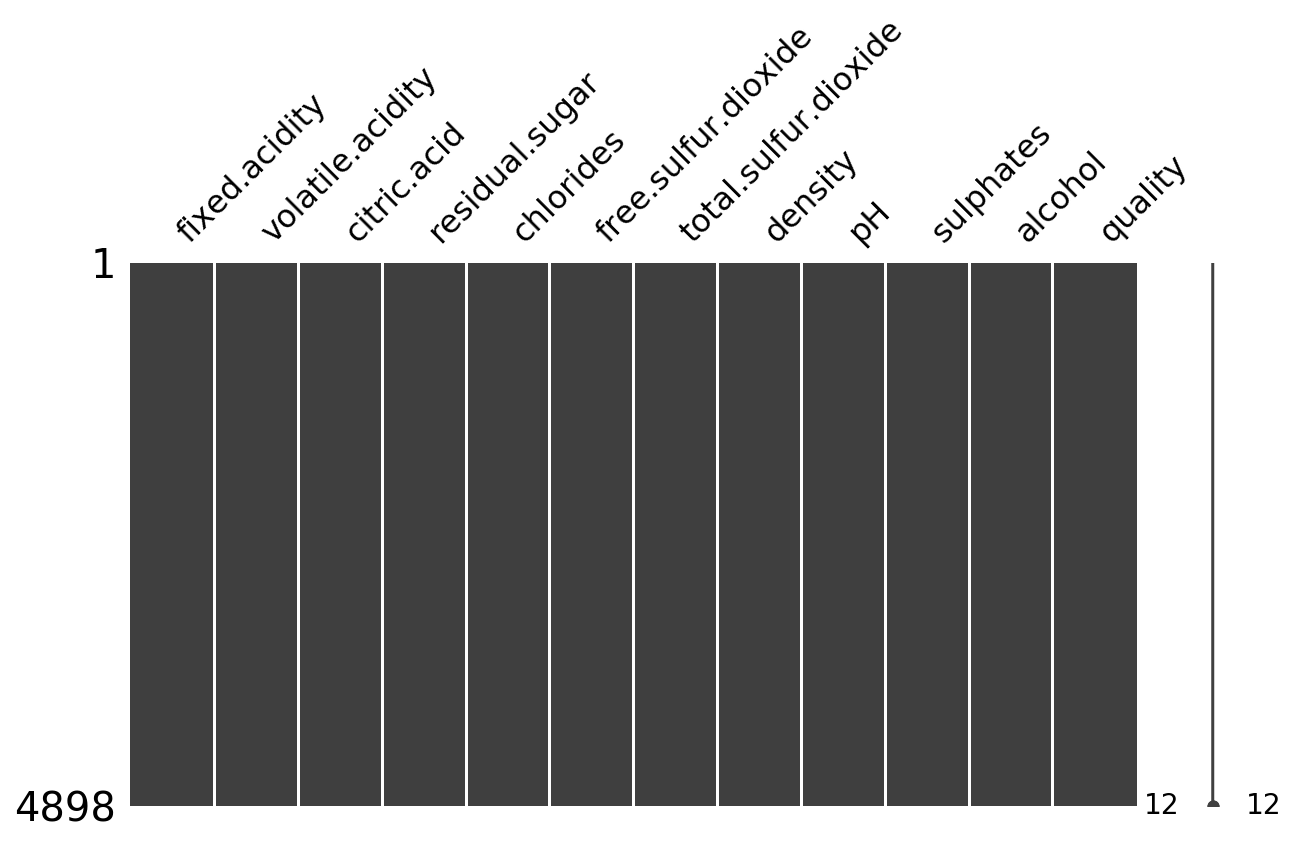

In [5]:
# detecting missing data
msno.matrix(data, figsize=(10,5))

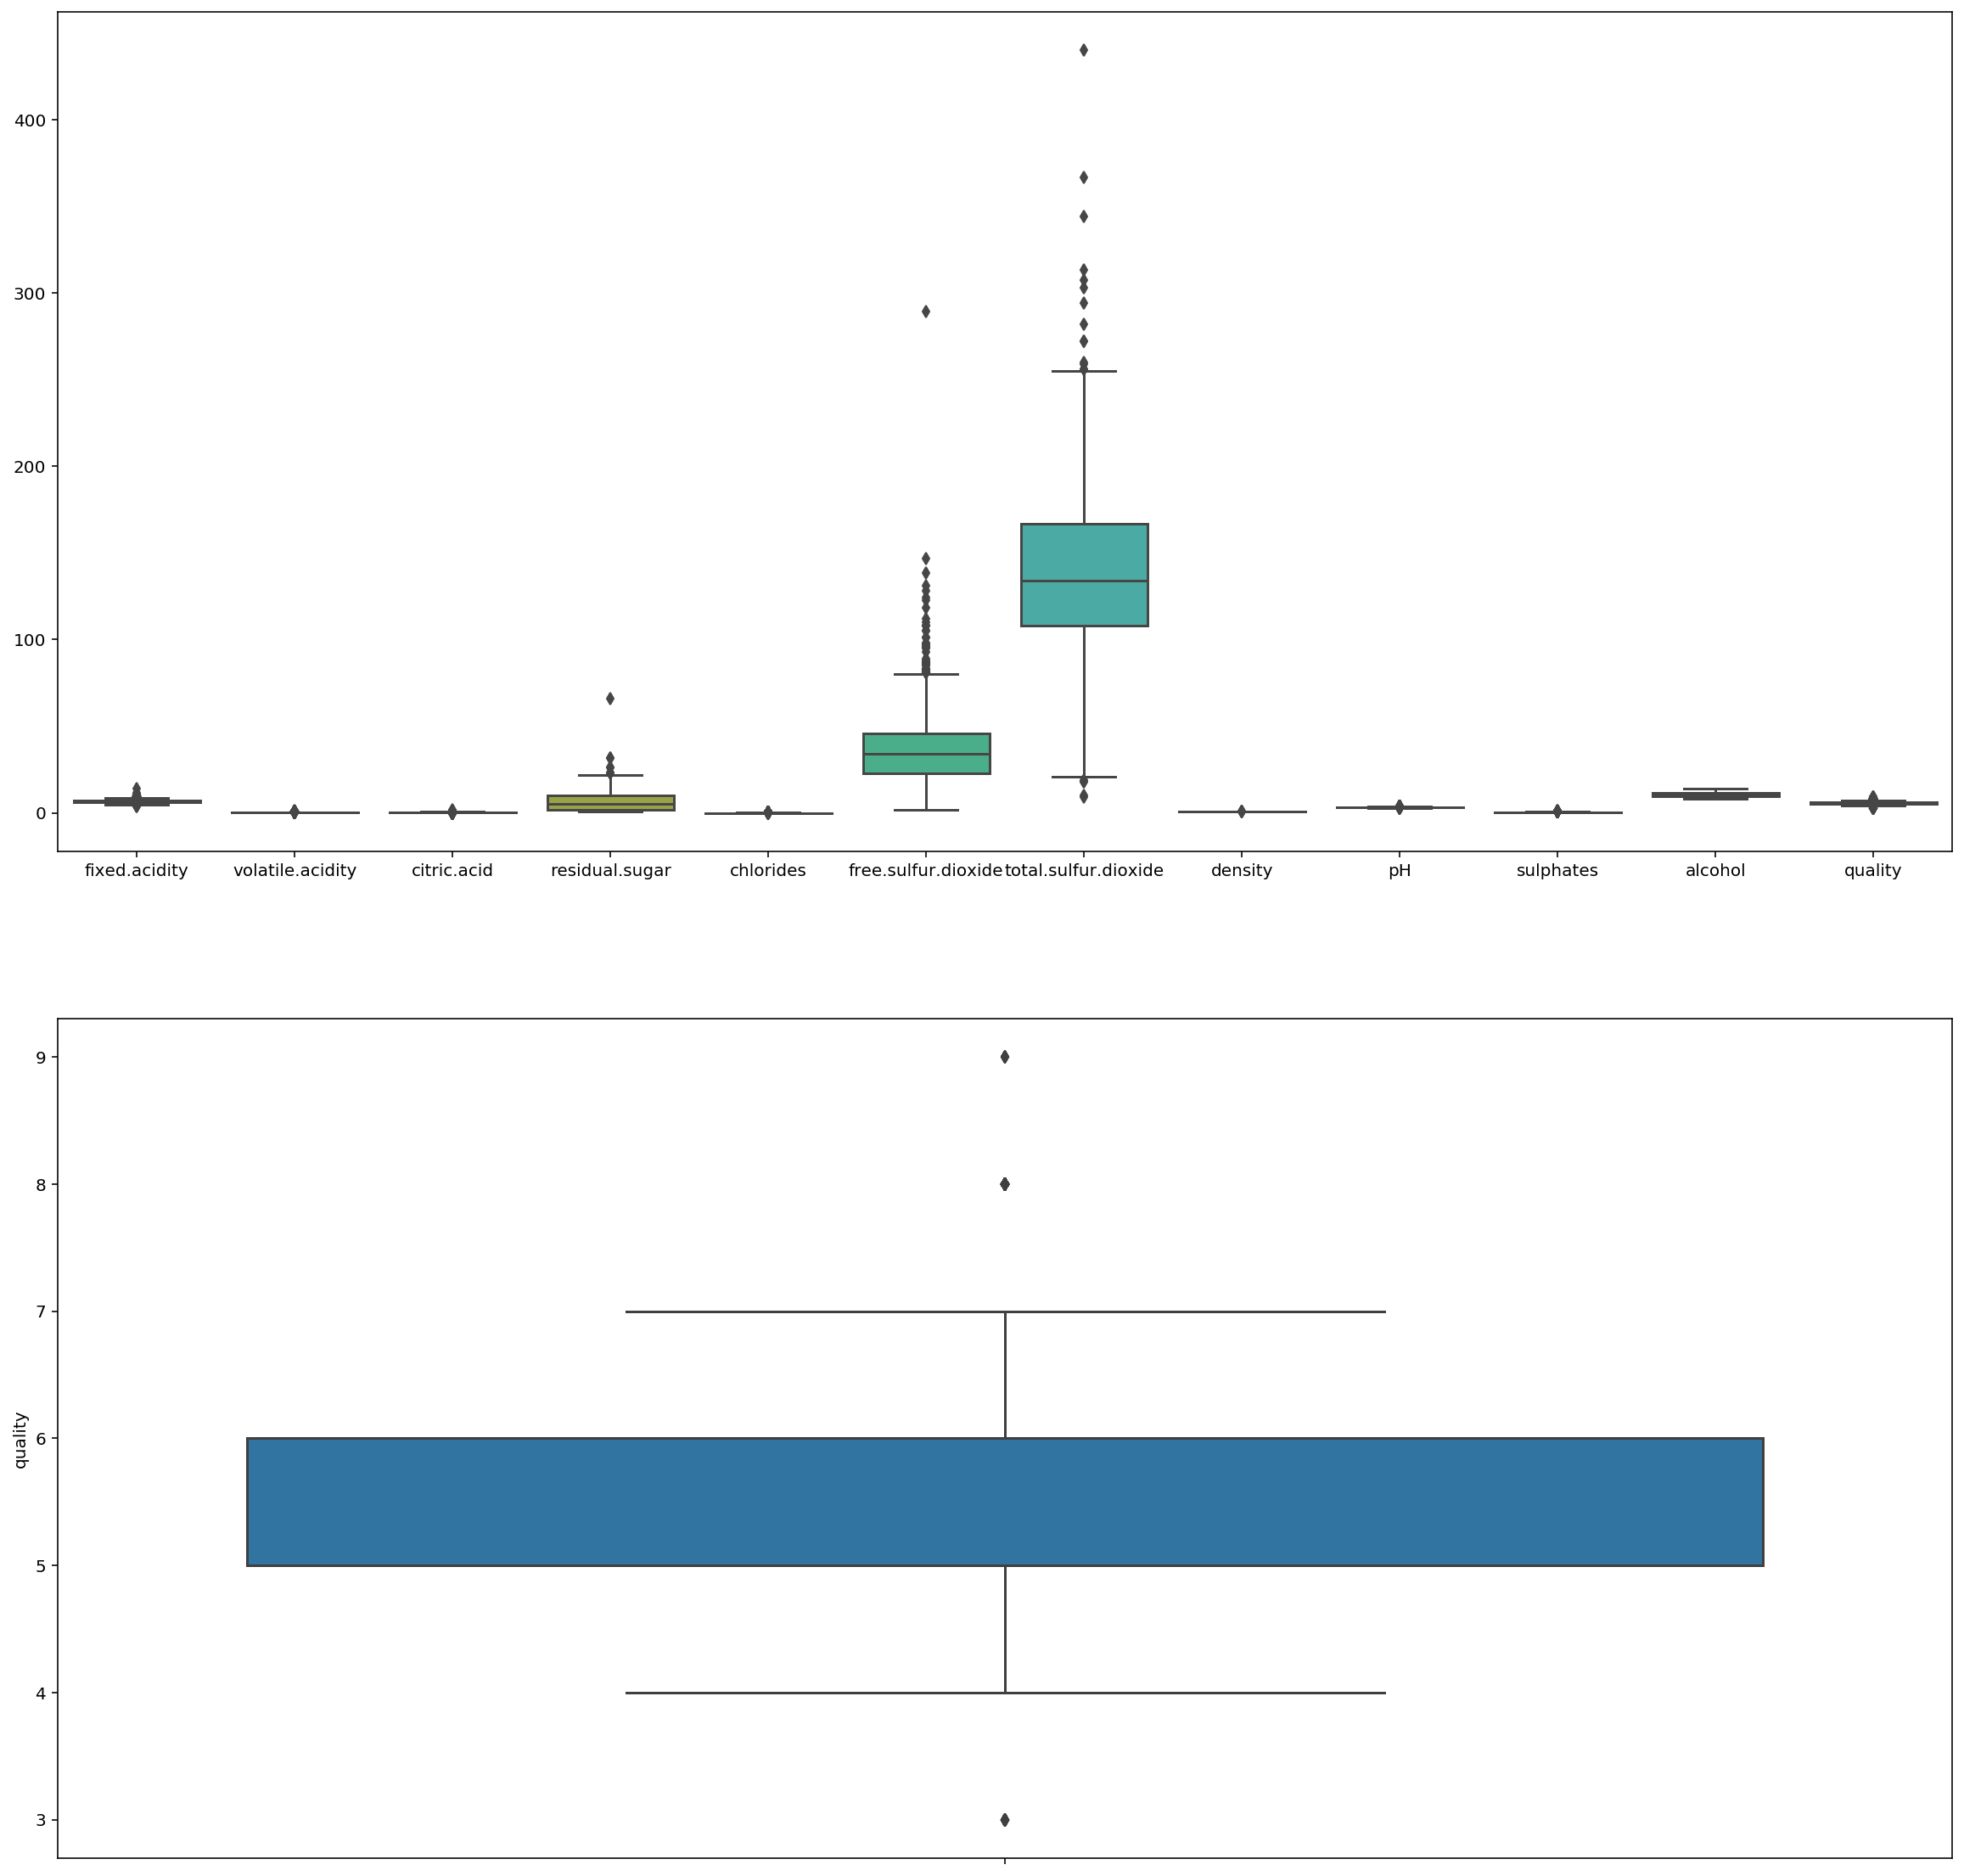

In [6]:
# distribution of data

fig, axes = plt.subplots(nrows = 2, ncols = 1)
fig.set_size_inches(20,20)
sb.boxplot(data = data, orient = "v", ax = axes[0])
sb.boxplot(data = data, y = "quality", orient = "pH", ax=axes[1])

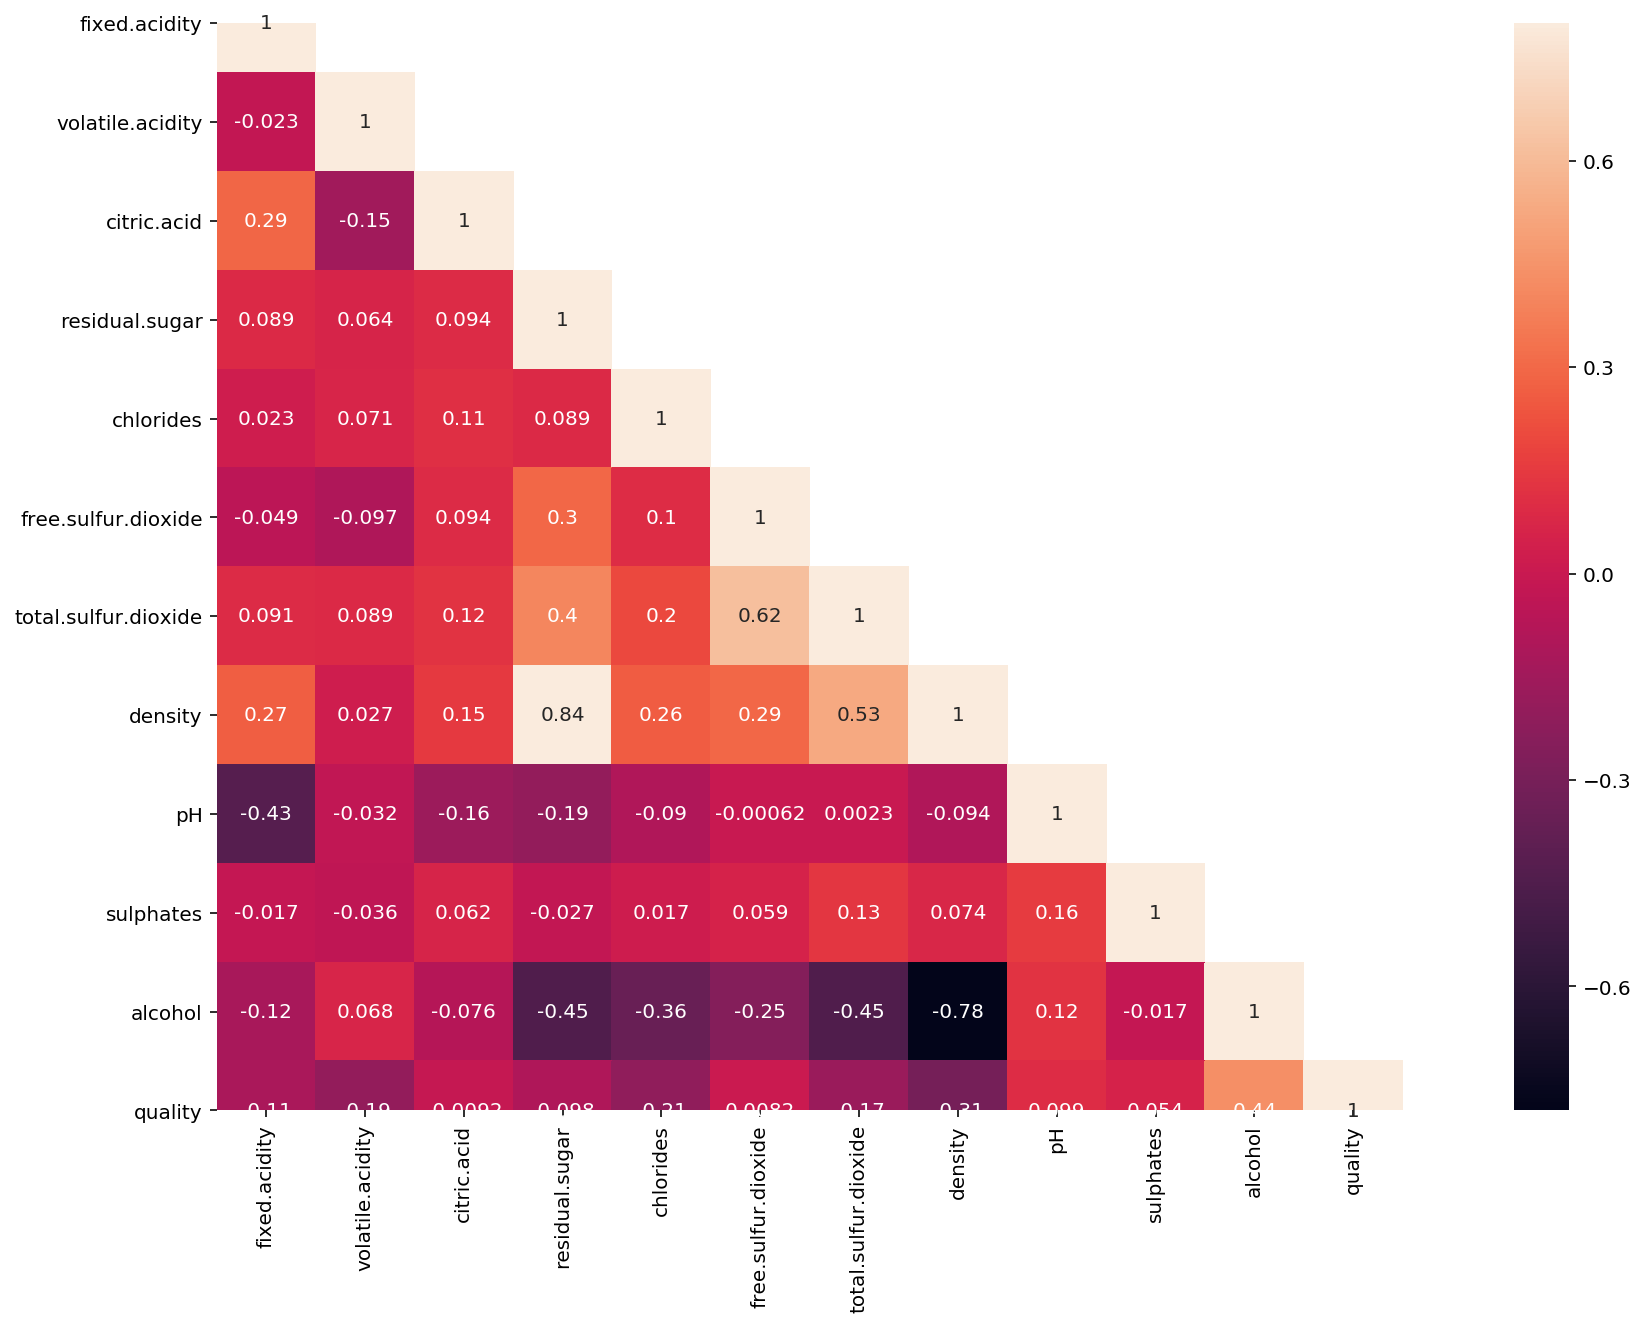

In [7]:
# Correlation analysis

corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax  = plt.subplots()
fig.set_size_inches(20,10)
sb.heatmap(corrMatt, mask=mask, vmax=0.8, square=True, annot=True)

In [24]:
x = data.iloc[:, :-1]   # this will select all the columns except the last one
y = data.iloc[:, -1]    # this will select the last column 

In [25]:
# Splitting the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [26]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [27]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
col_values = list(x.columns.values)
coeff_df = pd.DataFrame(model.coef_, col_values, columns=['Coefficient'])
print(coeff_df)

                      Coefficient
fixed.acidity            0.042140
volatile.acidity        -0.183050
citric.acid              0.010954
residual.sugar           0.371984
chlorides                0.000697
free.sulfur.dioxide      0.064090
total.sulfur.dioxide    -0.023006
density                 -0.380466
pH                       0.084047
sulphates                0.069949
alcohol                  0.266460


In [29]:
y_pred = model.predict(x_test)

In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
1078,5,5.802163
1324,6,5.974581
1528,6,5.917584
2755,5,5.167584
4624,6,6.566067
701,7,6.978315
4690,6,5.518679
3612,6,6.093568
3927,5,6.191701
3752,5,5.773426


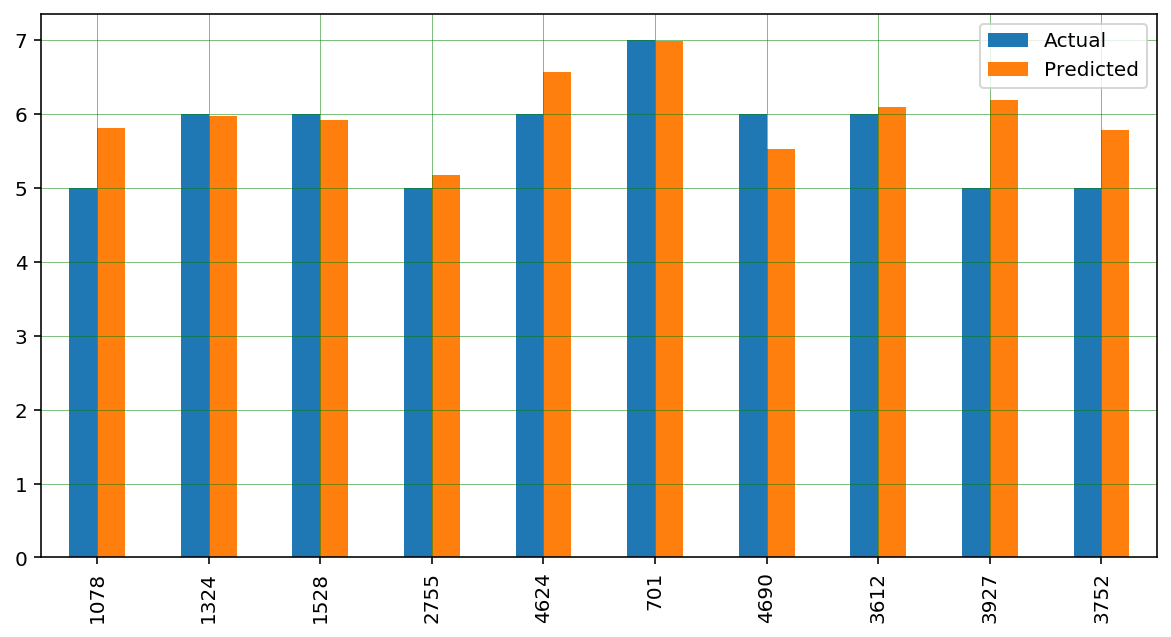

In [31]:
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.25', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='black')
plt.show()

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5944615756096495
Mean Squared Error: 0.5707871972660374
Root Mean Squared Error: 0.7555045977795486
